In [1]:
def softmax(a):
    C = numpy.max(a)
    minus = a-C
    exp_a = numpy.exp(minus)
    sum_exp_a=numpy.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

class neuralNetwork :
    def __init__(self,inputnodes,hiddennodes1,hideennodes2,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes1=hiddennodes1
        self.hnodes2=hideennodes2
        self.onodes=outputnodes
        
        self.lr=learningrate
        
        if self.hnodes1==0:
            #self.wih=numpy.array(numpy.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.inodes)))
            #self.who=numpy.array(numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2)))
            self.wih=numpy.full((self.hnodes2,self.inodes),0.5)
            self.who=numpy.full((self.onodes,self.hnodes2),0.5)
        else:
            self.wih1=numpy.array(numpy.random.normal(0.0,pow(self.hnodes1,-0.5),(self.hnodes1,self.inodes)))
            self.wih2=numpy.array(numpy.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.hnodes1)))
            self.who=numpy.array(numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2)))  
        pass
            
        self.activation_function=lambda x:scipy.special.expit(x)
        self.activation_function2=lambda b:softmax(b)
        
    pass
    
    
    def train(self,inputs_list,targets_list,mode):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        if self.hnodes1==0:
            inputs=numpy.array(inputs_list,ndmin=2).T
            targets=numpy.array(targets_list,ndmin=2).T
        
            hidden_inputs=numpy.dot(self.wih,inputs)
            hidden_outputs=self.activation_function(hidden_inputs)
        
            final_inputs=numpy.dot(self.who,hidden_outputs)
            final_outputs=self.activation_function2(final_inputs)
        
            output_errors=targets-final_outputs
            hidden_errors=numpy.dot(self.who.T,output_errors)       
        
            self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),numpy.transpose(inputs))
            self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs))
               
        else:
            hidden_inputs1=numpy.dot(self.wih1,inputs)
            hidden_outputs1=self.activation_function(hidden_inputs1)
        
            hidden_inputs2=numpy.dot(self.wih2,hidden_outputs1)
            hidden_outputs2=self.activation_function(hidden_inputs2)
        
            final_inputs=numpy.dot(self.who,hidden_outputs2)
            final_outputs=self.activation_function2(final_inputs)
        
        
            output_errors=targets-final_outputs
            hidden_errors2=numpy.dot(self.who.T,output_errors)
            hidden_errors1=numpy.dot(self.wih2.T, hidden_errors2)
        
            self.wih1+=self.lr*numpy.dot((hidden_errors1*hidden_outputs1*(1-hidden_outputs1)),numpy.transpose(inputs))        
            self.wih2+=self.lr*numpy.dot((hidden_errors2*hidden_outputs2*(1-hidden_outputs2)),numpy.transpose(hidden_outputs1))        
            self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs2))
        pass
        
        
        
        if mode=='w':
            if self.hnodes1==0:
                return self.wih,self.who
            else :
                return self.wih1,self.wih2,self.who
        elif mode == 'o':
            #return hidden_outputs,final_outputs
            return final_outputs
        elif mode =='e':
            return output_errors,hidden_errors
        
    
    
    def query(self,inputs_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        if self.hnodes1==0:
            hidden_inputs=numpy.dot(self.wih,inputs)        
            hidden_outputs=self.activation_function(hidden_inputs)
        
            final_inputs=numpy.dot(self.who,hidden_outputs)        
            final_outputs=self.activation_function2(final_inputs)
            
        else:
            hidden_inputs1=numpy.dot(self.wih1,inputs)
            hidden_outputs1=self.activation_function(hidden_inputs1)
        
            hidden_inputs2=numpy.dot(self.wih2,hidden_outputs1)
            hidden_outputs2=self.activation_function(hidden_inputs2)
        
            final_inputs=numpy.dot(self.who,hidden_outputs2)
            final_outputs=self.activation_function2(final_inputs)
        
        return final_outputs
     

In [2]:
import numpy
import matplotlib.pyplot as plt
import scipy.special


# 입력, 은닉, 출력 노드의 수
input_nodes = 2
hidden_nodes1= 2
hidden_nodes2 =3
output_nodes = 4
 
# 학습률
learning_rate = 0.2
 
# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes1,hidden_nodes2, output_nodes, learning_rate)

# train csv 파일을 리스트로 불러오기
training_data_file = open("simple.csv", 'r',encoding='utf-8-sig')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
 
epochs = 300
Acc=[]

WIH=[[] for _ in range(hidden_nodes2*input_nodes)]
WIH1=[[] for _ in range(hidden_nodes1*input_nodes)]
WIH2=[[] for _ in range(hidden_nodes1*hidden_nodes2)]
WHO=[[] for _ in range(hidden_nodes2*output_nodes)]


for e in range(epochs):
    accuracy=[]
    correct_x=[]
    correct_y=[]
    print(e+1,'번째')
    for record in training_data_list:        
        all_values = record.split(',') # 레코드를 쉼표에 의해 분리
        
        # 입력 값의 범위와 값 조정
        inputs = numpy.asfarray(all_values[1:3])/10 +0.01    
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(n.onodes)+0.01
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])-1] = 0.99
        
        if ((int(all_values[0])-1)==numpy.argmax(n.train(inputs, targets,'o'))):
            accuracy.append(1)
            correct_x.append(int(all_values[1]))
            correct_y.append(int(all_values[2]))
            
        else:
            accuracy.append(0)
            pass       

        
        if n.hnodes1==0:
            for ih in range(input_nodes*hidden_nodes2):
            #for i in range(input_nodes-1):
                #for h in range(hidden_nodes1):
                    WIH[ih].append(float(n.wih[int(ih/input_nodes)][ih%input_nodes]))
            
            for ih2 in range(output_nodes*hidden_nodes2):
             #for i2 in range(output_nodes):
                #for h2 in range(hidden_nodes2):
                    WHO[ih2].append(n.who[int(ih2/hidden_nodes2)][ih2%hidden_nodes2])  
                   
        else :    
            
            for ih in range(input_nodes*hidden_nodes1):
            #for i in range(input_nodes-1):
                #for h in range(hidden_nodes1):
                    WIH1[ih].append(float(n.wih1[int(ih/input_nodes)][ih%input_nodes]))
                    
         
            for ih1 in range(hidden_nodes1*hidden_nodes2):
             #for i1 in range(hidden_nodes1):
                # for h1 in range(hidden_nodes2):
                    WIH2[ih1].append(n.wih2[int(ih1/hidden_nodes1)][ih1%hidden_nodes1])
                    
                    
            for ih2 in range(output_nodes*hidden_nodes2):
             #for i2 in range(output_nodes):
                #for h2 in range(hidden_nodes2):
                    WHO[ih2].append(n.who[int(ih2/hidden_nodes2)][ih2%hidden_nodes2])                    
                    
            
    accuracy_array=numpy.asarray(accuracy)
    Acc.append(accuracy_array.sum()/len(training_data_list)*100)
    print('---- 학습률 : ',accuracy_array.sum()/len(training_data_list)*100,'% ----')


1 번째
---- 학습률 :  25.0 % ----
2 번째
---- 학습률 :  25.0 % ----
3 번째
---- 학습률 :  25.0 % ----
4 번째
---- 학습률 :  25.0 % ----
5 번째
---- 학습률 :  25.0 % ----
6 번째
---- 학습률 :  25.0 % ----
7 번째
---- 학습률 :  25.0 % ----
8 번째
---- 학습률 :  25.0 % ----
9 번째
---- 학습률 :  25.0 % ----
10 번째
---- 학습률 :  25.0 % ----
11 번째
---- 학습률 :  25.0 % ----
12 번째
---- 학습률 :  25.0 % ----
13 번째
---- 학습률 :  25.0 % ----
14 번째
---- 학습률 :  25.0 % ----
15 번째
---- 학습률 :  25.0 % ----
16 번째
---- 학습률 :  25.0 % ----
17 번째
---- 학습률 :  25.0 % ----
18 번째
---- 학습률 :  25.0 % ----
19 번째
---- 학습률 :  25.0 % ----
20 번째
---- 학습률 :  25.0 % ----
21 번째
---- 학습률 :  25.0 % ----
22 번째
---- 학습률 :  0.0 % ----
23 번째
---- 학습률 :  0.0 % ----
24 번째
---- 학습률 :  0.0 % ----
25 번째
---- 학습률 :  0.0 % ----
26 번째
---- 학습률 :  0.0 % ----
27 번째
---- 학습률 :  0.0 % ----
28 번째
---- 학습률 :  0.0 % ----
29 번째
---- 학습률 :  0.0 % ----
30 번째
---- 학습률 :  0.0 % ----
31 번째
---- 학습률 :  0.0 % ----
32 번째
---- 학습률 :  0.0 % ----
33 번째
---- 학습률 :  0.0 % ----
34 번째
---- 학습률 :  0.0 % ----
35

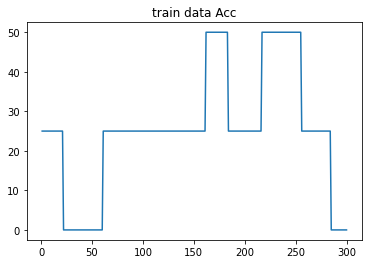

In [3]:
x1 = numpy.arange(1,epochs+1)
plt.title('train data Acc')
plt.plot(x1,Acc)

은닉층 1개 : wih,who 그래프    //    은닉층 2개 : wih1,wih2, who 그래프

In [4]:
x=range(1,epochs*4+1)

In [5]:
plt.figure(figsize=(10,6))
if n.hnodes1==0:
    for a in range(input_nodes*hidden_nodes2):
        plt.plot(x,WIH[a],label=f'WIH[{a}]')
        plt.title('wih')
        plt.text(x[-1]+100+100*a,WIH[a][-1],f'WIH[{a}]')
        
    plt.legend()
    

<Figure size 720x432 with 0 Axes>

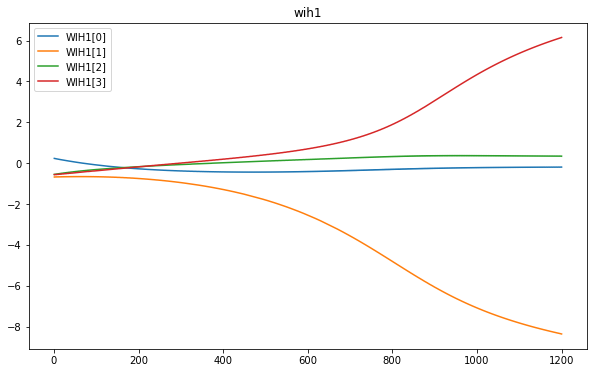

In [6]:
plt.figure(figsize=(10,6))
if n.hnodes1>0:
    for a in range(input_nodes*hidden_nodes1):
        plt.plot(x,WIH1[a],label=f'WIH1[{a}]')
        plt.title('wih1')
       # plt.text(x[-1]+100*a+100,WIH1[a][-1],f'WIH1[{a}]')
    plt.legend()

In [7]:
plt.figure(figsize=(10,6))
if n.hnodes1>0:
    for a in range(hidden_nodes2*hidden_nodes1):
        plt.plot(x,WIH2[a],label=f'WIH2[{a}]')
        plt.title('wih2')
        #plt.text(x[-1]+100*a+100,WIH2[a][-1],f'WIH2[{a}]')
    plt.legend()

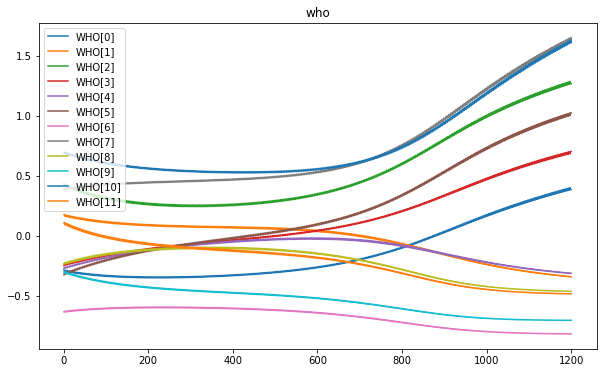

In [8]:
plt.figure(figsize=(10,6))
for a in range(hidden_nodes2*output_nodes):
    plt.plot(x,WHO[a],label=f'WHO[{a}]')
    plt.title('who')
    #plt.text(x[-1]+100*a+100,WHO[a][-1],f'WHO[{a}]')
        
plt.legend()